In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##Загрузим данные и посмотрим их полноту, сделаем описание

In [3]:
!git clone https://github.com/Almodovare/Training_Data

fatal: destination path 'Training_Data' already exists and is not an empty directory.


In [5]:
df = pd.read_excel("/content/Training_Data/Political metrics.xlsx")

In [ ]:
df.sample(6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Unnamed: 0                                                 194 non-null    int64  
 1   country                                                    194 non-null    object 
 2   armed forces personnel                                     174 non-null    float64
 3   internally displaced persons, by conflict and violence     75 non-null     float64
 4   military expenditure                                       163 non-null    float64
 5   individuals using the Internet                             194 non-null    float64
 6   net migration                                              194 non-null    int64  
 7   proportion of seats held by women in national parliaments  193 non-null    float64
 8   press free

In [12]:
df_1 = df.iloc[:,[2,4,5,6,7,8,9]]

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   armed forces personnel                                     174 non-null    float64
 1   military expenditure                                       163 non-null    float64
 2   individuals using the Internet                             194 non-null    float64
 3   net migration                                              194 non-null    int64  
 4   proportion of seats held by women in national parliaments  193 non-null    float64
 5   press freedom                                              194 non-null    float64
 6   democracy score                                            194 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.7 KB


In [14]:
df_1.describe()

,armed forces personnel,military expenditure,individuals using the Internet,net migration,proportion of seats held by women in national parliaments,press freedom,democracy score
count,1.740000e+02,163.000000,194.000000,1.940000e+02,193.000000,194.000000,194.000000
mean,1.565517e+05,2.440193,68.618925,6.622216e+02,25.346856,2.539330,4.644536
std,3.747221e+05,3.599140,26.333481,2.364123e+05,12.675875,1.800128,2.818297
min,0.000000e+00,0.054093,0.000000,-1.619557e+06,0.000000,0.000000,0.000000
25%,1.025000e+04,0.992507,44.616400,-1.000300e+04,16.444444,1.525000,2.722500
50%,3.000000e+04,1.613895,77.612250,-5.385000e+02,25.600000,2.400000,5.050000
75%,1.375000e+05,2.687172,89.458650,9.879500e+03,33.812950,2.925000,6.967500
max,3.068000e+06,36.653110,100.000000,1.322668e+06,61.250000,10.000000,9.870000


##Визуализируем взаимосвязи с помощью тепловой карты и матрицы диаграмм рассеивания

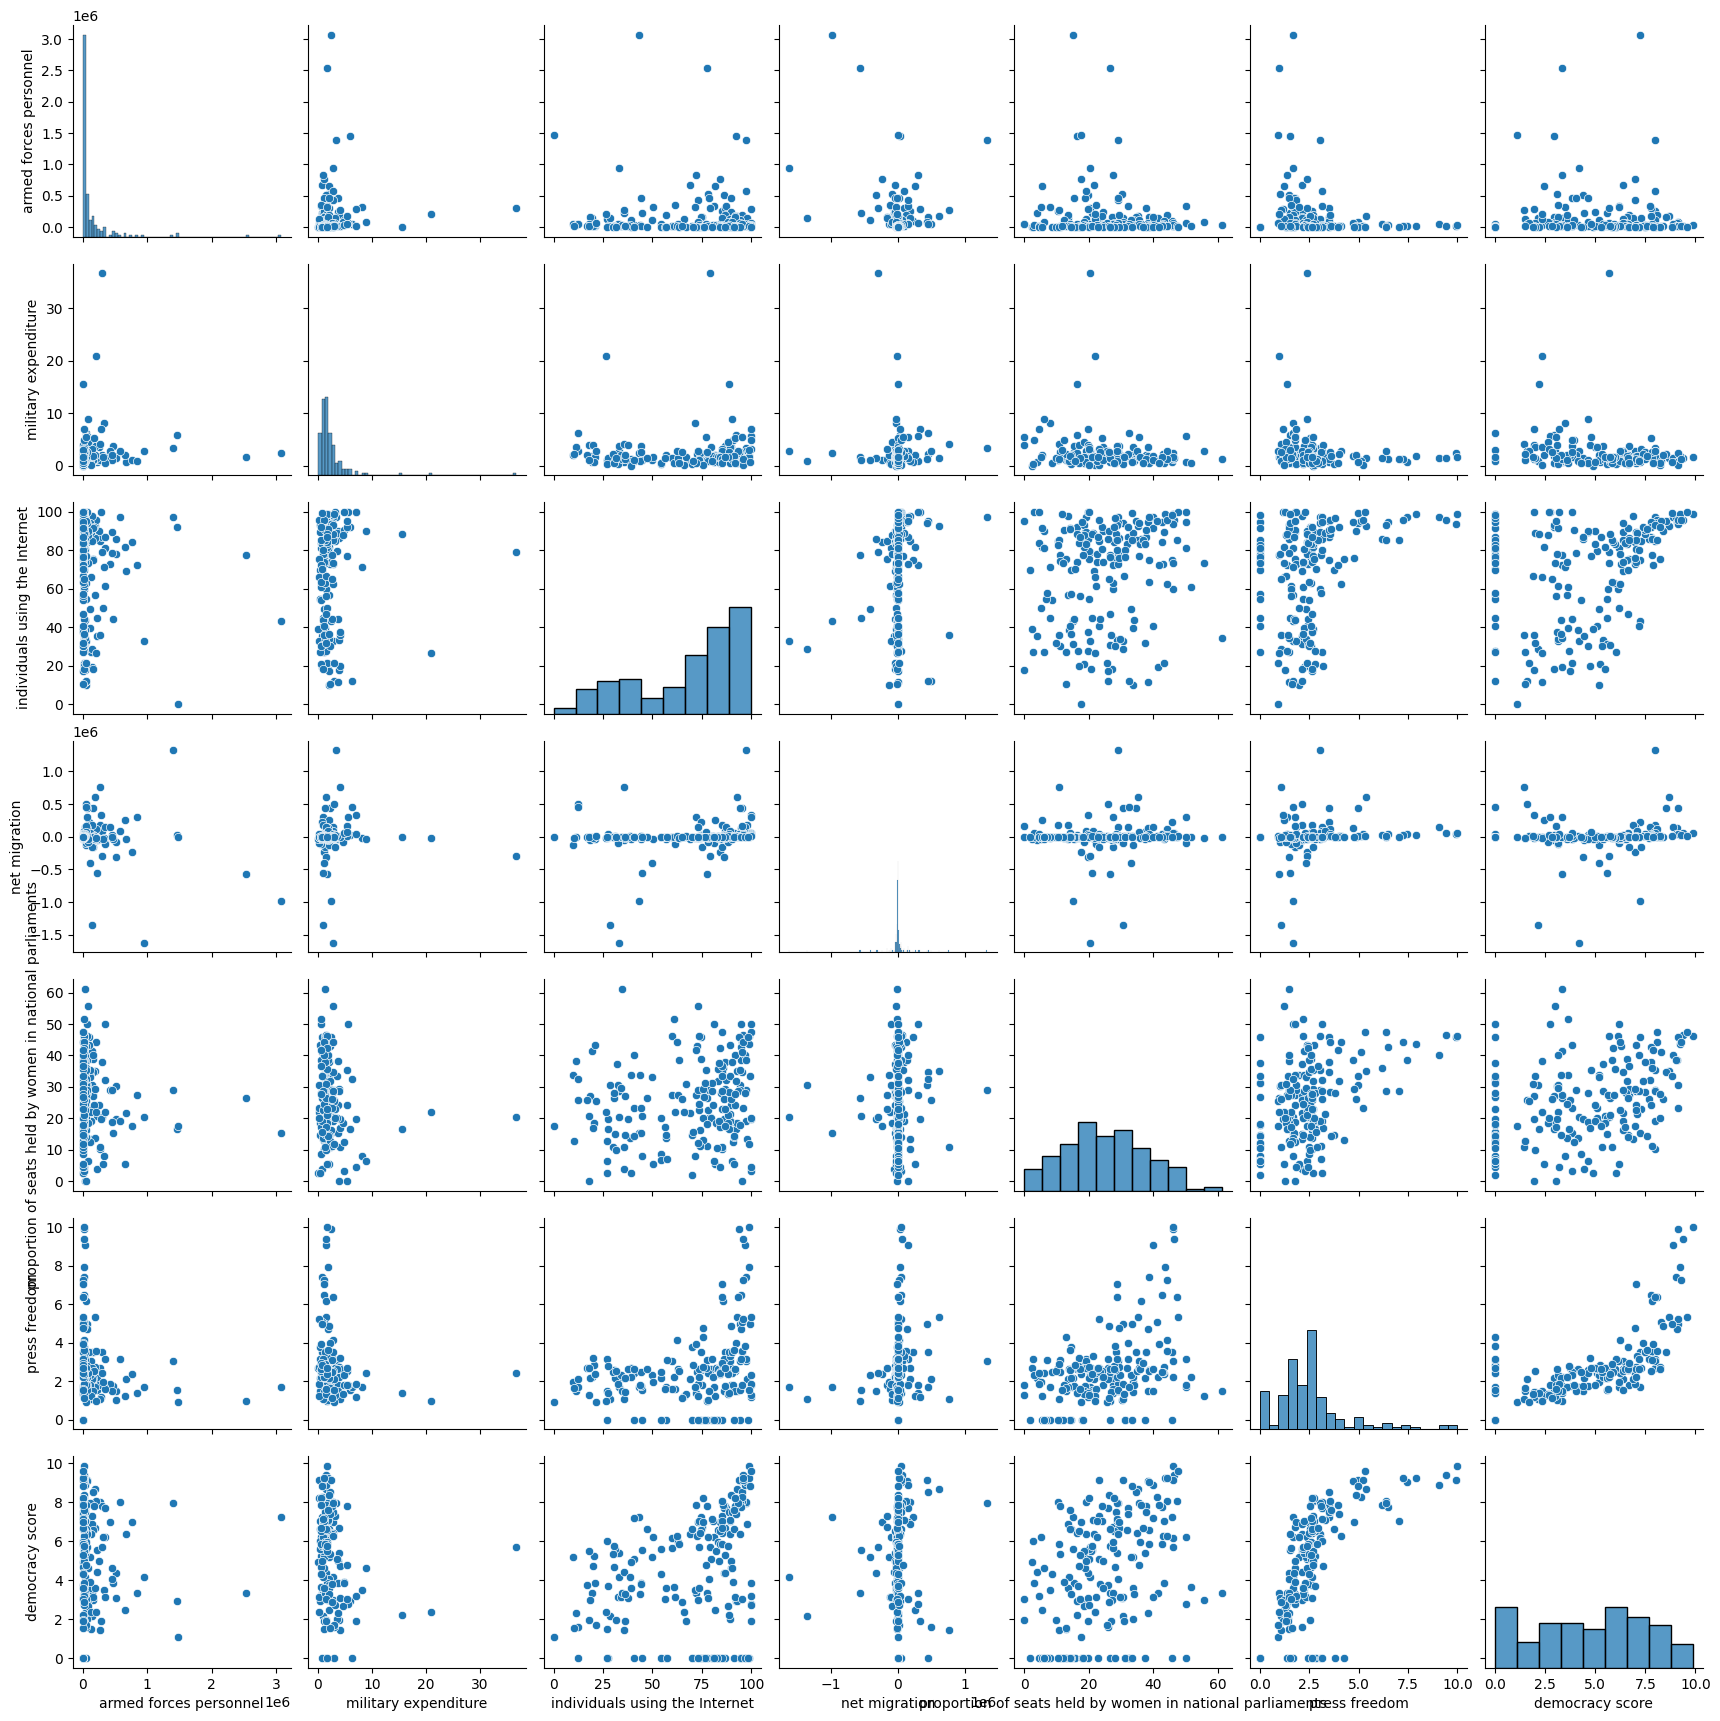

In [15]:
sns.pairplot(df_1)

<Axes: >

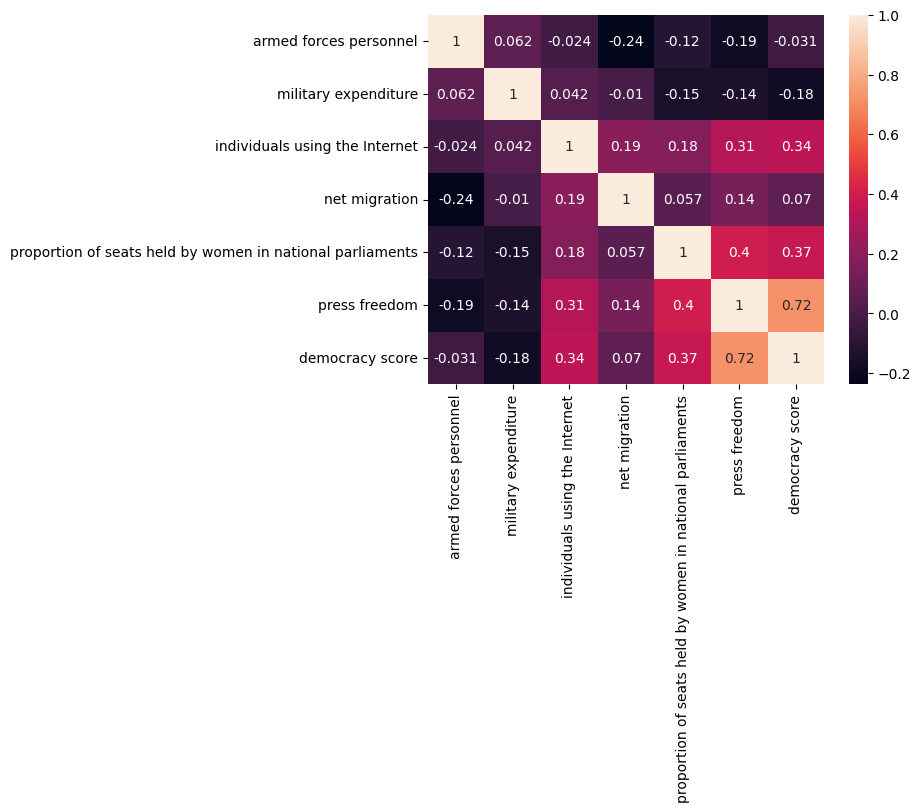

In [19]:
sns.heatmap(df_1.corr(), annot = True) # тепловая карта для матрицы корреляции, аргумент annot отвечает за
# отражение значений коэффициентов на карте

In [ ]:
# Вывод: наиболее тесно из всех оцениваемых политичексих показателей связаны: уровень демократии и свобода прессы (r=0,72),
#  уровень демократии и доля мест в парламенте, занимаемых женщинами ( r = 0,37), а также свобода прессы и доля лиц,
# пользующихся интернетом ( r= 0,31). Для этип пар показателей коэффициенты корреляции отражают тесноту связи,
# которая характеризуется как умеренная и сильнее.

## Расчет коэффициентов корреляции с помощью различных библиотек

In [ ]:
# В pandas корреляция рассчитывается с помощью .corr(), при этом
# если необходимо использовать расчет по методу Спирмена, это указывается
#  с помощью аргумента method = 'spearman', если с помощью метода Кэндалла,
# то 'kendall'. По умолчанию рассчитывается коэффициент корреляции Пирсона

In [21]:
df_1.corr(method= 'spearman')

,armed forces personnel,military expenditure,individuals using the Internet,net migration,proportion of seats held by women in national parliaments,press freedom,democracy score
armed forces personnel,1.000000,0.228989,0.015724,-0.085081,0.002154,-0.297437,-0.010766
military expenditure,0.228989,1.000000,0.140500,0.139209,-0.144764,-0.236801,-0.239203
individuals using the Internet,0.015724,0.140500,1.000000,0.463088,0.201077,0.330427,0.388175
net migration,-0.085081,0.139209,0.463088,1.000000,0.130952,0.276786,0.204878
proportion of seats held by women in national parliaments,0.002154,-0.144764,0.201077,0.130952,1.000000,0.328672,0.390155
press freedom,-0.297437,-0.236801,0.330427,0.276786,0.328672,1.000000,0.776410
democracy score,-0.010766,-0.239203,0.388175,0.204878,0.390155,0.776410,1.000000


In [ ]:
# В scipy.stats используются отдельные методы для каждого коэффициента корреляции
# stats.spearmanr - для ро Спирмена
# stats.pearsonr - для Пирсона
# stats.kendalltau - для Кендалла

In [24]:
stats.spearmanr(df_1['democracy score'], df_1['press freedom'])

SignificanceResult(statistic=np.float64(0.7764101730693213), pvalue=np.float64(2.3535199266703834e-40))

In [ ]:
# Вывод: коэффициент корреляции Спирмена, вычисленный для показателей
# уровень демократии и свобода прессы составил 0,77. При этом он статистически значим
#  (p-val<0,05). Это свидетельствует о наличии прямой тесной взаимосвязи между переменными.
# Либо
# Вывод: наблюдается статистически значимая прямая тесная взаимосвязь между
# уровнем демократиии и свободой прессы (r Cпирмена = 0,77; p-val<0,05)